In [1]:
import imblearn
from sklearn.datasets import make_classification
import pandas as pd

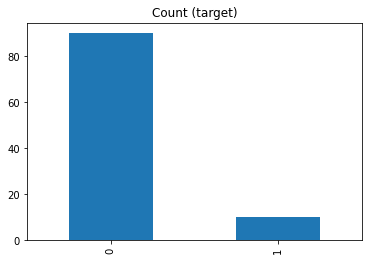

In [2]:
X, y = make_classification(n_classes=2, class_sep=1.5, weights=[.9, .1], 
                          n_informative=3, n_redundant=1, flip_y=0,
                          n_features=20, n_clusters_per_class=1,
                          n_samples=100, random_state=10)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

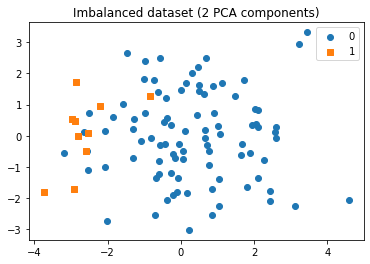

In [3]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')


# Random Undersampler

removed indices  [60  5 98 18 34 82 88 68 75 57  4  8  9 14 16 40 67 70 71 74]


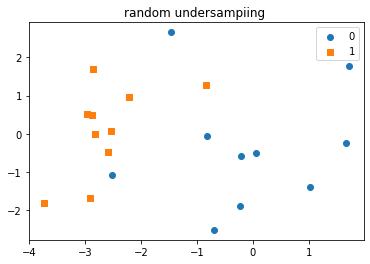

In [4]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

print("removed indices ", rus.sample_indices_)

plot_2d_space(X_rus, y_rus, "random undersampiing ")

added indices  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99 74 74 71 67 74 16 70  8 16  4  4 67 70  4  9 71 74  8  8  8
  8 14 74 40 71 67  8  9 67 40 67 74  8  4 67 74 14 71 40 74 14 71 14 74
  4 16 14 14  9  9 16 67 74 40 70 70 14 40 70 16 70  8  4  4 71 71 16 71
 70 40 16  4 14  8 67 70 70 71 40 70]


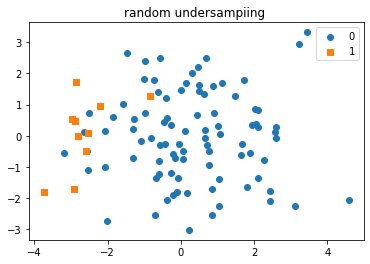

180 180 100


In [5]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print("added indices ", ros.sample_indices_)

plot_2d_space(X_ros, y_ros, "random undersampiing ")
print (len(ros.sample_indices_), X_ros.shape[0], X.shape[0])

# Undersampling Tomek Links

Removed indices :  [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


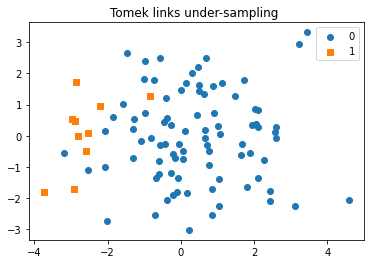

In [6]:
from imblearn.under_sampling import TomekLinks

t1 = TomekLinks(sampling_strategy='majority')
X_t1, y_t1 = t1.fit_sample(X, y)

print("Removed indices : ", t1.sample_indices_)
plot_2d_space(X_t1, y_t1, "Tomek links under-sampling ")

# Undersampling Cluster Centroids

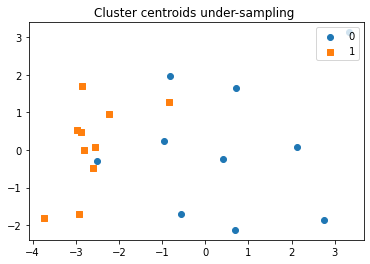

In [7]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)


plot_2d_space(X_cc, y_cc, "Cluster centroids under-sampling ")

# Over sampling SMOTE

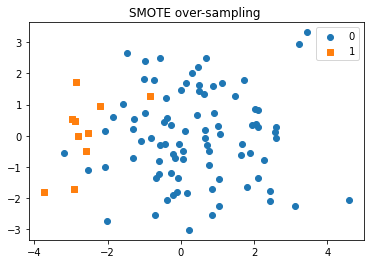

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)



plot_2d_space(X_t1, y_t1, "SMOTE over-sampling ")

# Over sampling followed by under sampling

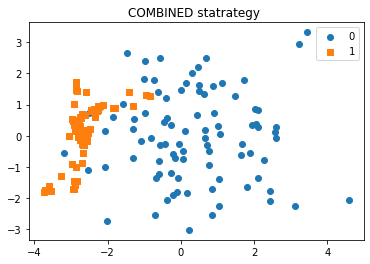

In [9]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')

X_smt, y_smt = smt.fit_sample(X, y)



plot_2d_space(X_smt, y_smt, "COMBINED statrategy ")